In [1]:
import torch 

import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


In [26]:
CHECKPOINTS_PATH = '/Users/gojkoc54/GOJKO/EPFL/courses/CS433_Machine_Learning/ECOL_project/checkpoints'
DATA_PATH = '/Users/gojkoc54/GOJKO/EPFL/courses/CS433_Machine_Learning/ECOL_project/data/labeled_data'

MODEL_METRICS_DICT = {
    'alexnet': 'alexnet/alexnet_metrics_per_epoch.pt',
    'densenet121': 'densenet121/densenet_metrics_per_epoch.pt',
    'resnet18': 'resnet18/resnet_metrics_per_epoch.pt', 
    'vgg16': 'vgg16/vgg_metrics_per_epoch.pt'
    }

METRICS_PATHS_DICT = {}
for model_name in MODEL_METRICS_DICT:
    METRICS_PATHS_DICT[model_name] = os.path.join(
        CHECKPOINTS_PATH, MODEL_METRICS_DICT[model_name]
        )

MODEL_TEST_METRICS_DICT = {
    'alexnet': 'alexnet/alexnet_test_metrics.pt',
    'densenet121': 'densenet121/densenet_test_metrics.pt',
    'resnet18': 'resnet18/resnet_test_metrics.pt', 
    'vgg16': 'vgg16/vgg_test_metrics.pt'
    }

TEST_METRICS_PATHS_DICT = {}
for model_name in MODEL_TEST_METRICS_DICT:
    TEST_METRICS_PATHS_DICT[model_name] = os.path.join(
        CHECKPOINTS_PATH, MODEL_TEST_METRICS_DICT[model_name]
        )

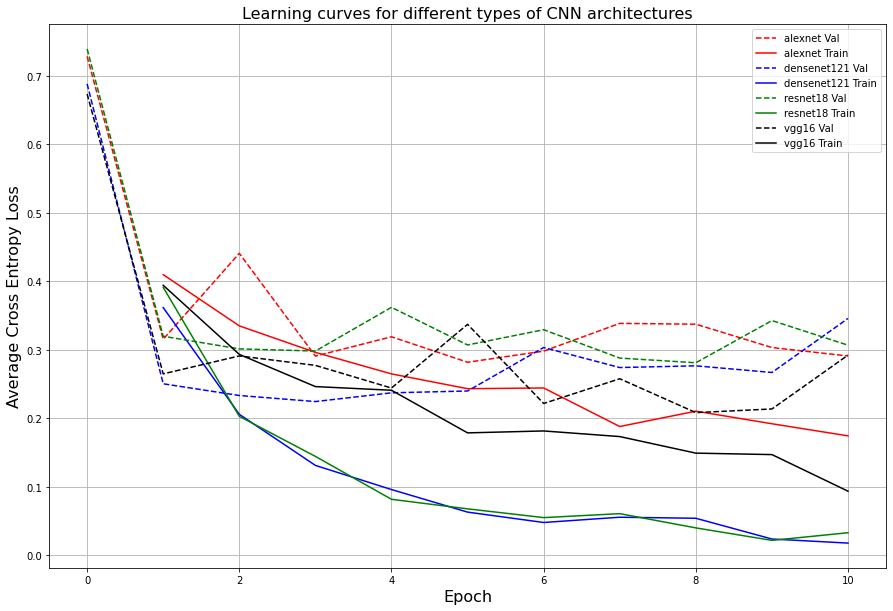

In [10]:
# plt.style.use("ggplot")
# import tikzplotlib


val_keys = list(range(0, 11))
train_keys = list(range(1, 11))

COLORS = ['r', 'b', 'g', 'k']
plt.figure(figsize=(15, 10))

for i, (model_name, metrics_path) in enumerate(METRICS_PATHS_DICT.items()):
    curr_metrics = torch.load(metrics_path)

    val_losses = [curr_metrics[i - 1]['val'].avg_loss for i in val_keys]
    train_losses = [curr_metrics[i - 1]['train'].avg_loss for i in train_keys]

    plt.plot(val_keys, val_losses, f'{COLORS[i]}--', label=f'{model_name} Val')
    plt.plot(train_keys, train_losses, f'{COLORS[i]}', label=f'{model_name} Train')

plt.title('Learning curves for different types of CNN architectures')
plt.ylabel('Average Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('../report_figures/cnns_learning_curves.png')
plt.show()

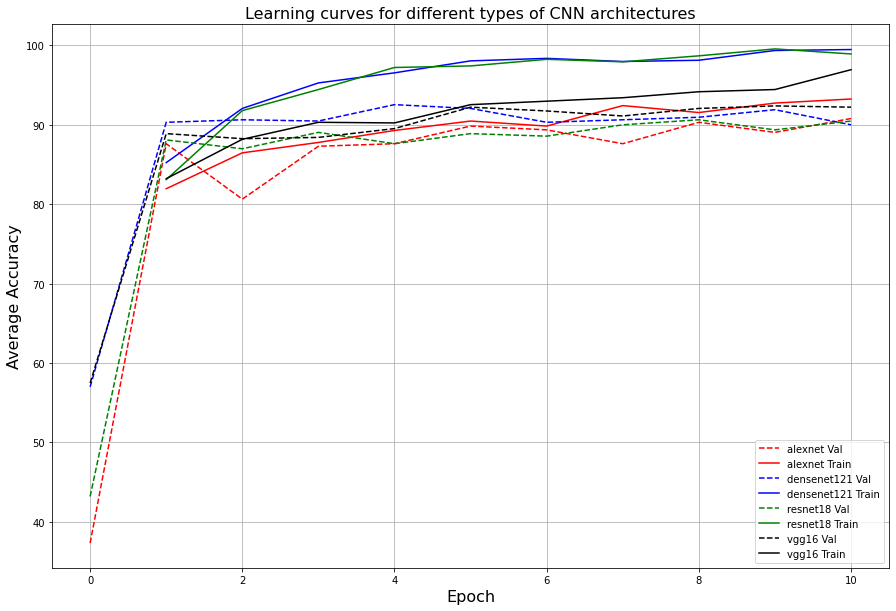

In [11]:
val_keys = list(range(0, 11))
train_keys = list(range(1, 11))

COLORS = ['r', 'b', 'g', 'k']
plt.figure(figsize=(15, 10))

for i, (model_name, metrics_path) in enumerate(METRICS_PATHS_DICT.items()):
    curr_metrics = torch.load(metrics_path)

    val_accs = [curr_metrics[i - 1]['val'].get_accuracy() for i in val_keys]
    train_accs = [curr_metrics[i - 1]['train'].get_accuracy() for i in train_keys]

    plt.plot(val_keys, val_accs, f'{COLORS[i]}--', label=f'{model_name} Val')
    plt.plot(train_keys, train_accs, f'{COLORS[i]}', label=f'{model_name} Train')

plt.title('Learning curves for different types of CNN architectures')
plt.ylabel('Average Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.savefig('../report_figures/cnns_learning_curves_accuracy.png')
plt.show()

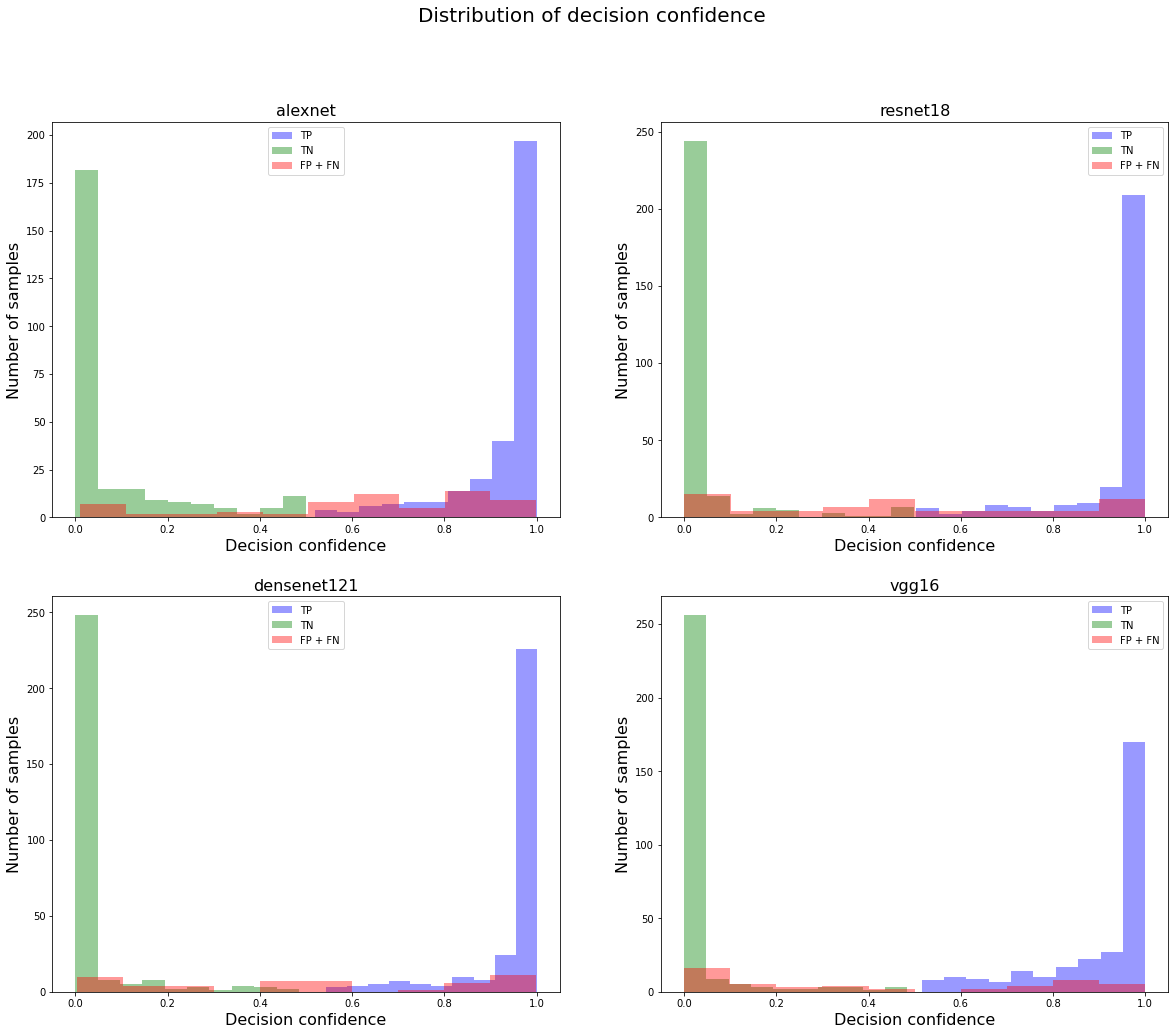

In [68]:
EPOCH = 4

fig, axs = plt.subplots(figsize=(20, 16), nrows=2, ncols=2)
fig.suptitle('Distribution of decision confidence', fontsize=20)

for i, (model_name, metrics_path) in enumerate(METRICS_PATHS_DICT.items()):
    curr_metrics = torch.load(metrics_path)

    confusion_arrays = curr_metrics[EPOCH]['val'].confusion_arrays    

    row, col = i % 2, i // 2
    axs[row][col].hist(confusion_arrays['tp'], color='b', alpha=0.4, label='TP')
    axs[row][col].hist(confusion_arrays['tn'], color='g', alpha=0.4, label='TN')
    axs[row][col].hist(
        confusion_arrays['fp'] + confusion_arrays['fn'], 
        color='r', alpha=0.4, label='FP + FN'
        )

    axs[row][col].set_ylabel('Number of samples')
    axs[row][col].set_xlabel('Decision confidence')
    axs[row][col].legend()
    axs[row][col].set_title(f'{model_name}')
    
plt.show()


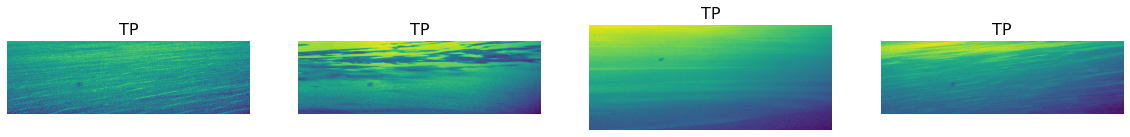

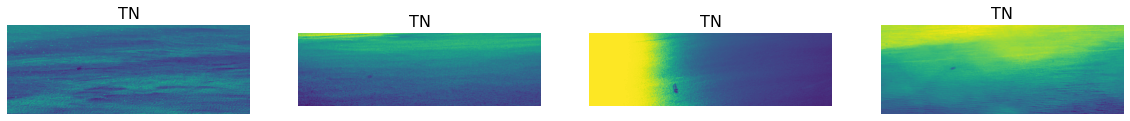

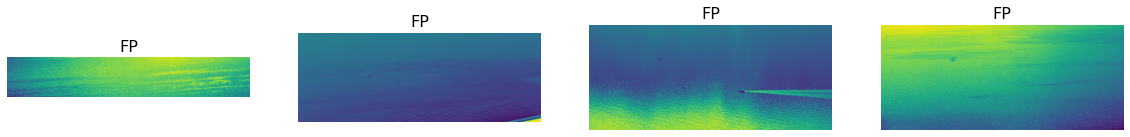

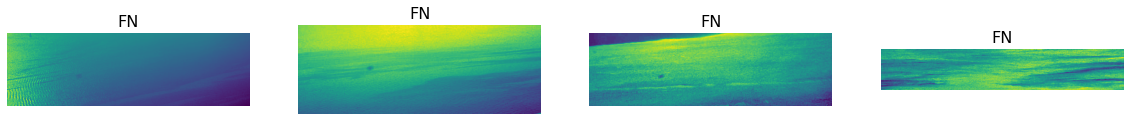

In [57]:
NUM_EXAMPLES = 4

metrics_path = TEST_METRICS_PATHS_DICT['resnet18']
curr_metrics = torch.load(metrics_path)

for key in curr_metrics.confusion_paths:

    examples = curr_metrics.confusion_paths[key][:NUM_EXAMPLES]

    fig, axs = plt.subplots(figsize=(5 * NUM_EXAMPLES, 30), nrows=1, ncols=NUM_EXAMPLES)

    for i in range(NUM_EXAMPLES):
        parent_dir = os.path.basename(os.path.dirname(examples[i]))
        img_path = os.path.join(parent_dir, os.path.basename(examples[i]))
        img_path = os.path.join(DATA_PATH, img_path)

        img = cv2.imread(img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f'{key.upper()}')
    
    plt.show()
